# Fibonacci Heap

A fibonacci heap is a data structure that consists of a collection of trees which follow min heap or max heap property.
 
These two properties are the characteristics of the trees present on a fibonacci heap.

In a fibonacci heap, a node can have more than two children or no children at all. Also, it has more efficient heap operations than that supported by the binomial and binary heaps.

The fibonacci heap is called a fibonacci heap because the trees are constructed in a way such that a tree of order n has at least Fn+2 nodes in it, where Fn+2 is the (n + 2)th Fibonacci number.

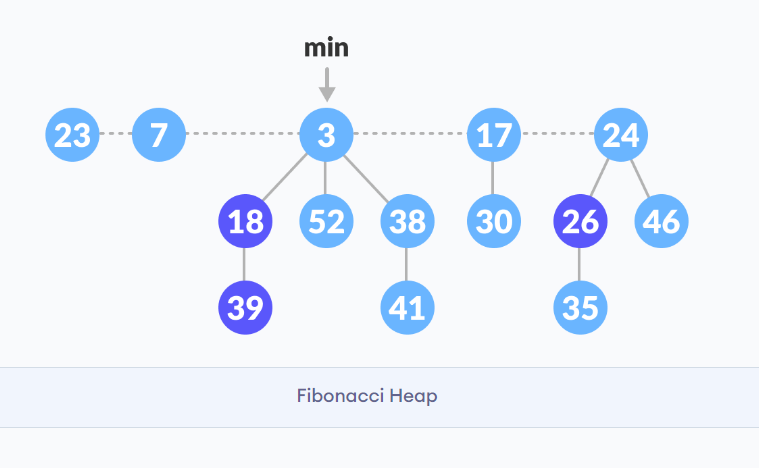

# Properties of a Fibonacci Heap

Important properties of a Fibonacci heap are:

It is a set of min heap-ordered trees. (i.e. The parent is always smaller than the children.)

A pointer is maintained at the minimum element node.

It consists of a set of marked nodes. (Decrease key operation)

The trees within a Fibonacci heap are unordered but rooted.

# Memory Representation of the Nodes in a Fibonacci Heap

The roots of all the trees are linked together for faster access. The child nodes of a parent node are connected to each other through a circular doubly linked list as shown below.

# There are two main advantages of using a circular doubly linked list.

* Deleting a node from the tree takes O(1) time.
* The concatenation of two such lists takes O(1) time.

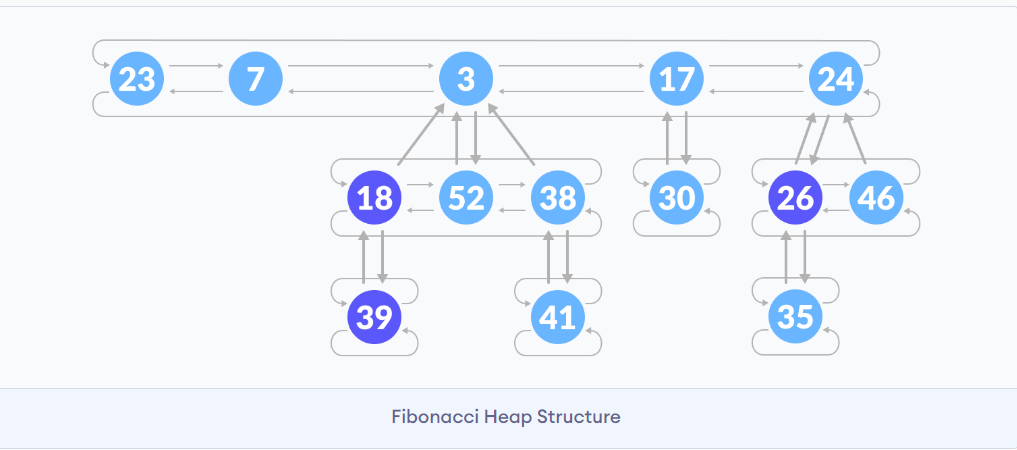

# Operations on a Fibonacci Heap

Insertion

In [1]:
class Node:
    def __init__(self, key):
        self.key = key
        self.degree = 0
        self.parent = None
        self.child = None
        self.left = self
        self.right = self
        self.mark = False

class FibonacciHeap:
    def __init__(self):
        self.min = None
        self.node_count = 0

    def insert(self, key):
        new_node = Node(key)
        if self.min is None:
            self.min = new_node
        else:
            self._concatenate(self.min, new_node)
            if new_node.key < self.min.key:
                self.min = new_node
        self.node_count += 1

    def _concatenate(self, min_node, new_node):
        new_node.left = min_node.left
        new_node.right = min_node.right
        min_node.left.right = new_node
        min_node.right.left = new_node
        new_node.left = min_node
        new_node.right = min_node.right

# Example usage:
fib_heap = FibonacciHeap()
fib_heap.insert(10)
fib_heap.insert(5)
fib_heap.insert(20)

print(fib_heap.min.key)  # Output: 5


5


# Inserting a node into an already existing heap follows the steps below.

Create a new node for the element.

Check if the heap is empty.

If the heap is empty, set the new node as a root node and mark it min.

Else, insert the node into the root list and update min.

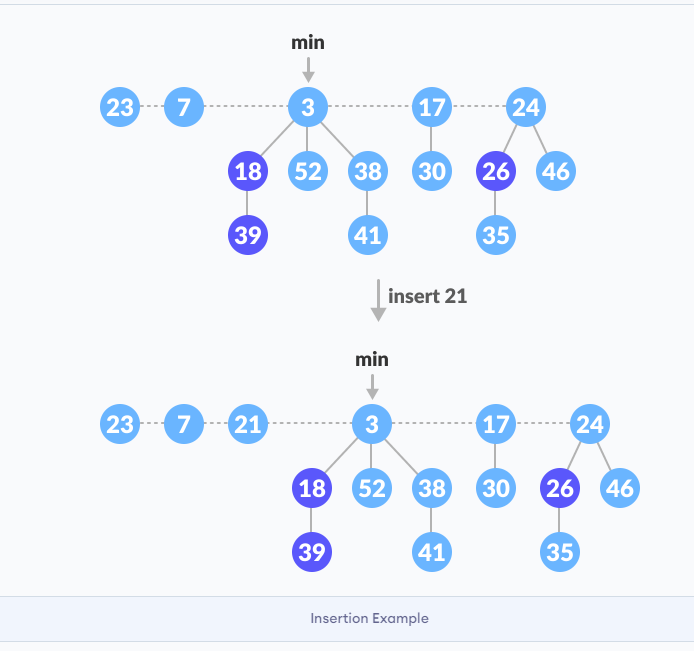

# Find Min

The minimum element is always given by the min pointer.

# Union
Union of two fibonacci heaps consists of following steps.

* Concatenate the roots of both the heaps.
* Update min by selecting a minimum key from the new root lists.

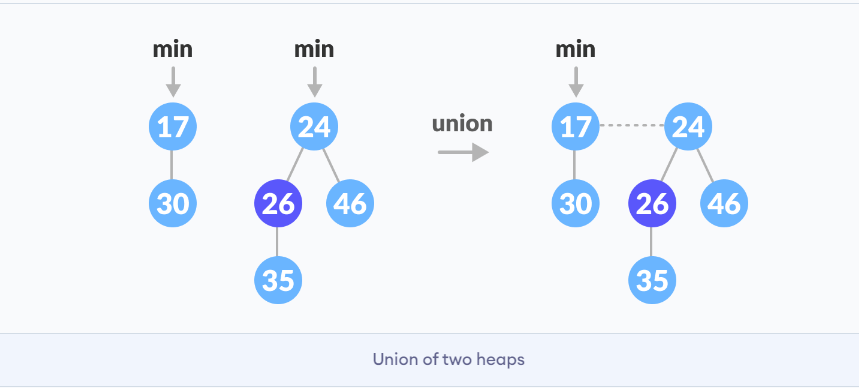

# Extract Min

It is the most important operation on a fibonacci heap. In this operation, the node with minimum value is removed from the heap and the tree is re-adjusted.

# The following steps are followed:

* Delete the min node.
* Set the min-pointer to the next root in the root list.
* Create an array of size equal to the maximum degree of the trees in the heap before deletion.
* Do the following (steps 5-7) until there are no multiple roots with the same degree.
* Map the degree of current root (min-pointer) to the degree in the array.
* Map the degree of next root to the degree in array.
* If there are more than two mappings for the same degree, then apply union operation to those roots such that the   min-heap property is maintained (i.e. the minimum is at the root).

# An implementation of the above steps can be understood in the example below.

* 1 We will perform an extract-min operation on the heap below.


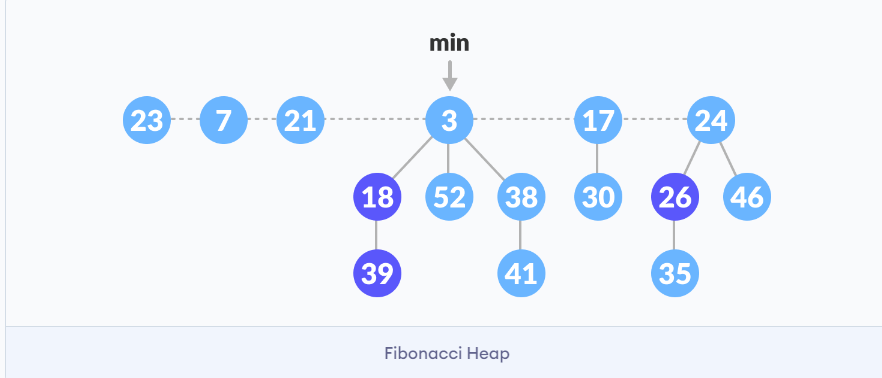

* 2. Delete the min node, add all its child nodes to the root list and set the min-pointer to the next root in the root list.

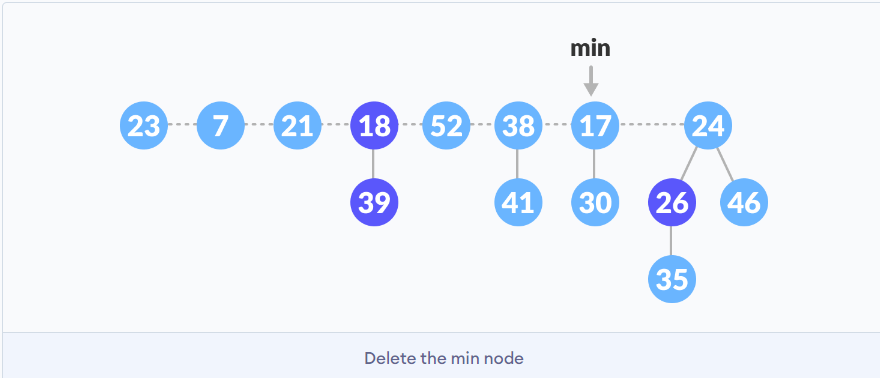

* 3. The maximum degree in the tree is 3. Create an array of size 4 and map degree of the next roots with the array.

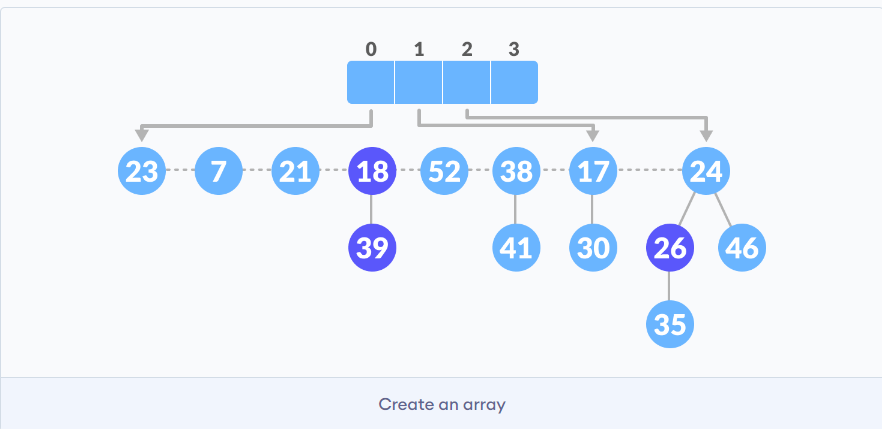

* 4.  Here, 23 and 7 have the same degrees, so unite them.


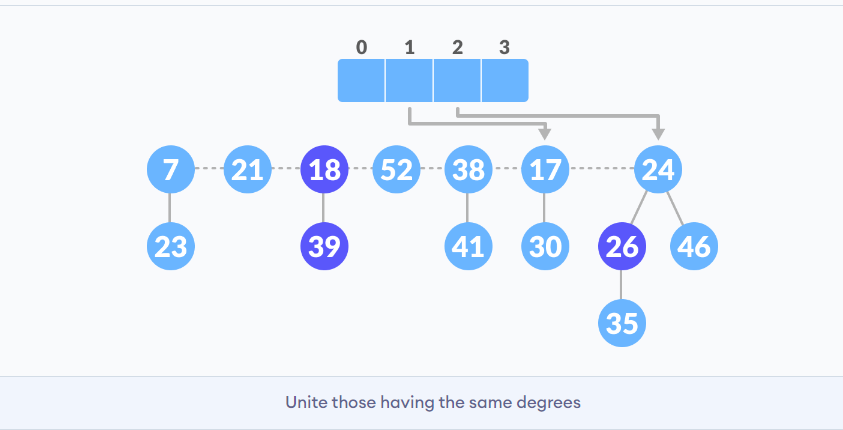

* 5.  Again, 7 and 17 have the same degrees, so unite them as well.


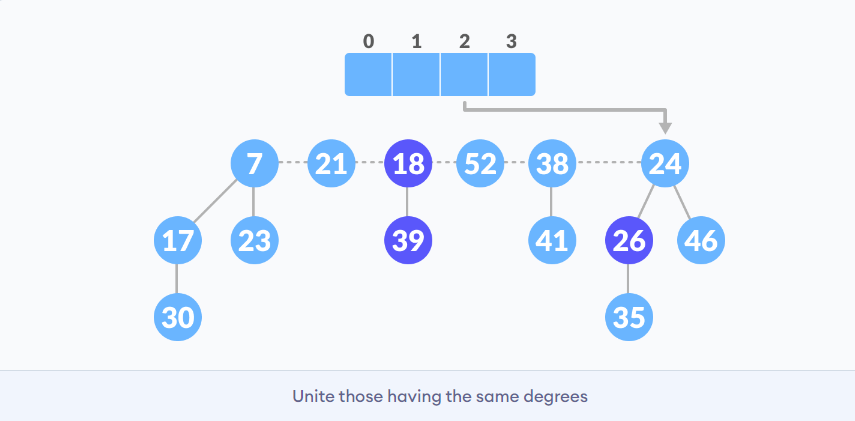

* 6. Again 7 and 24 have the same degree, so unite them.


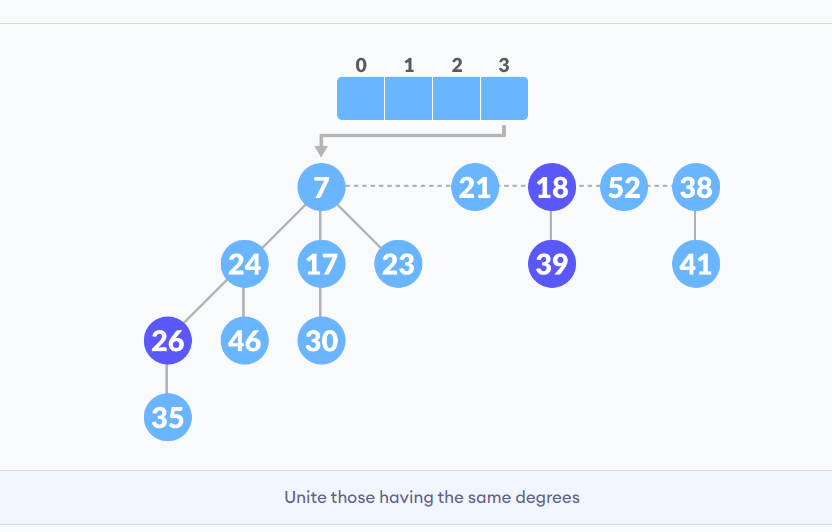

* 7. Map the next nodes

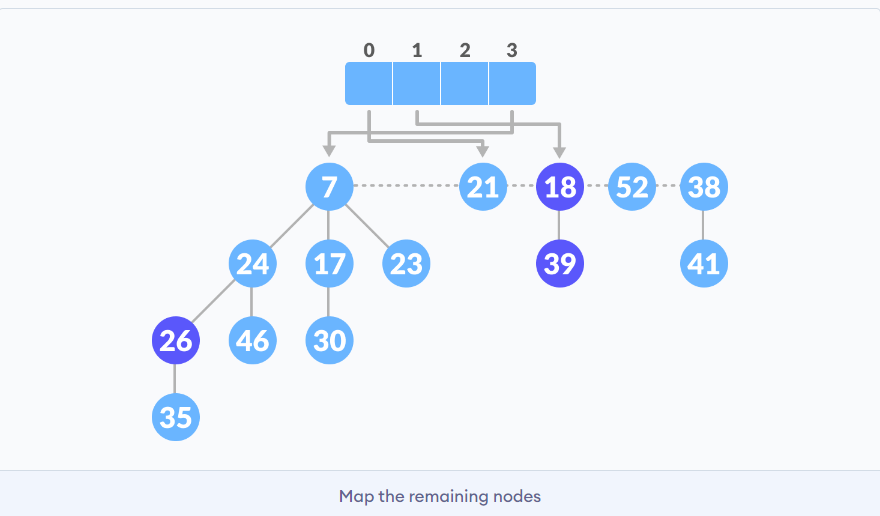

* 8 . Again, 52 and 21 have the same degree, so unite them


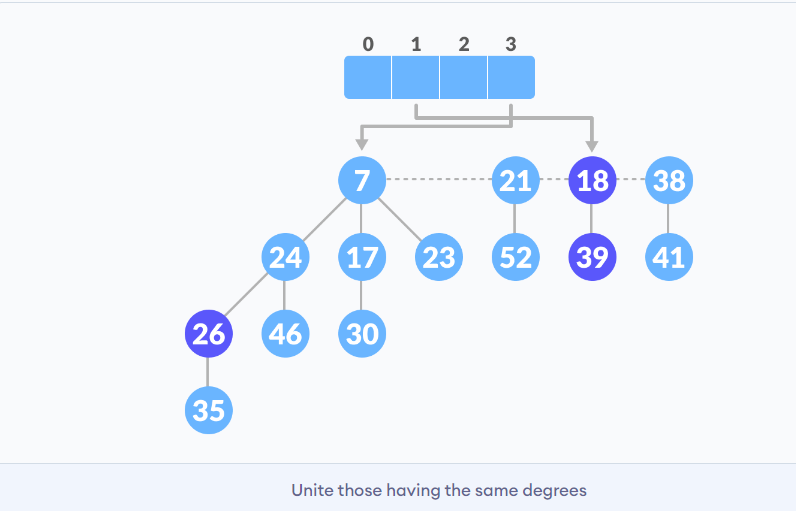

* 9 . Similarly, unite 21 and 18.


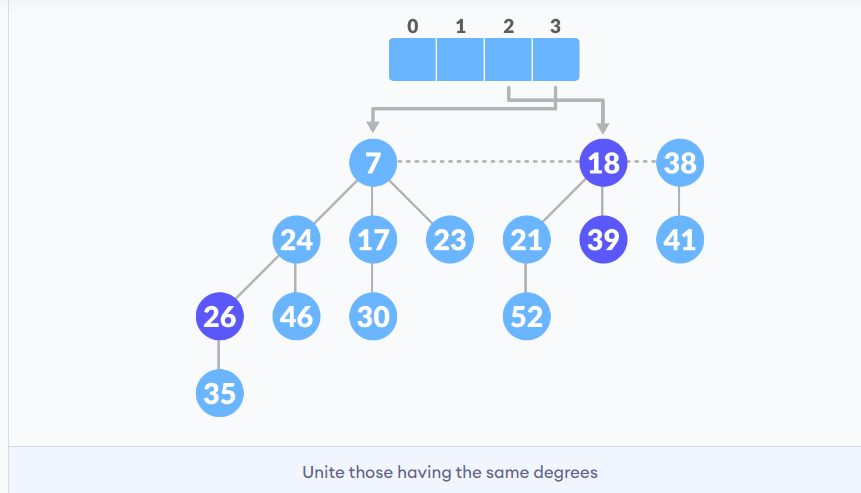

* 10. Map the remaining root.


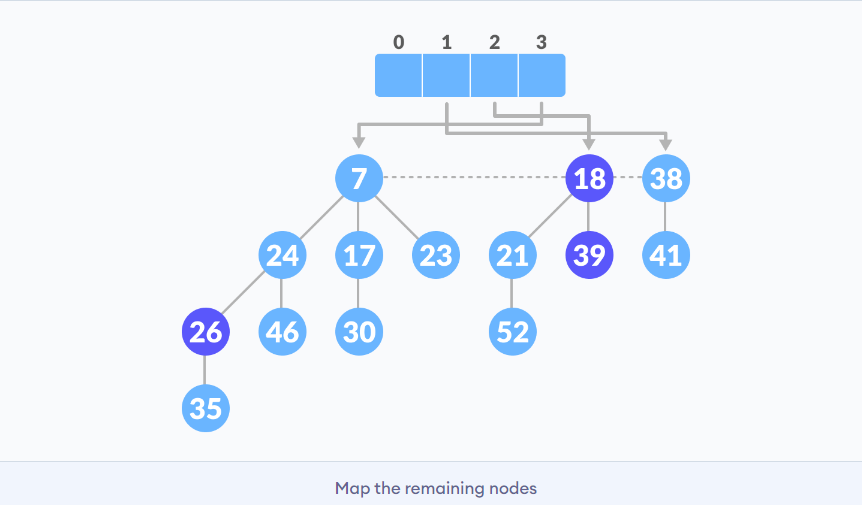

* 11 . The final heap is.


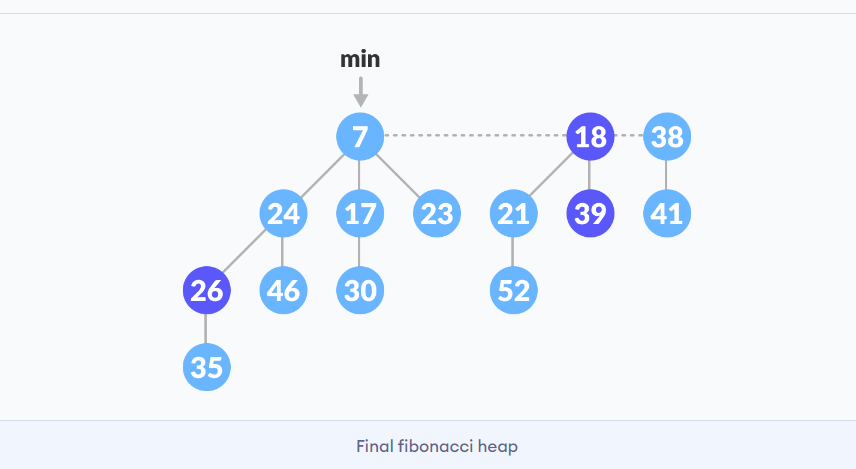

# Decreasing a Key and Deleting a Node
These are the most important operations which are discussed in Decrease Key and Delete Node Operations.

In [2]:
# Fibonacci Heap in python

import math

# Creating fibonacci tree
class FibonacciTree:
    def __init__(self, value):
        self.value = value
        self.child = []
        self.order = 0

    # Adding tree at the end of the tree
    def add_at_end(self, t):
        self.child.append(t)
        self.order = self.order + 1


# Creating Fibonacci heap
class FibonacciHeap:
    def __init__(self):
        self.trees = []
        self.least = None
        self.count = 0

    # Insert a node
    def insert_node(self, value):
        new_tree = FibonacciTree(value)
        self.trees.append(new_tree)
        if (self.least is None or value < self.least.value):
            self.least = new_tree
        self.count = self.count + 1

    # Get minimum value
    def get_min(self):
        if self.least is None:
            return None
        return self.least.value

    # Extract the minimum value
    def extract_min(self):
        smallest = self.least
        if smallest is not None:
            for child in smallest.child:
                self.trees.append(child)
            self.trees.remove(smallest)
            if self.trees == []:
                self.least = None
            else:
                self.least = self.trees[0]
                self.consolidate()
            self.count = self.count - 1
            return smallest.value

    # Consolidate the tree
    def consolidate(self):
        aux = (floor_log(self.count) + 1) * [None]

        while self.trees != []:
            x = self.trees[0]
            order = x.order
            self.trees.remove(x)
            while aux[order] is not None:
                y = aux[order]
                if x.value > y.value:
                    x, y = y, x
                x.add_at_end(y)
                aux[order] = None
                order = order + 1
            aux[order] = x

        self.least = None
        for k in aux:
            if k is not None:
                self.trees.append(k)
                if (self.least is None
                        or k.value < self.least.value):
                    self.least = k


def floor_log(x):
    return math.frexp(x)[1] - 1


fibonacci_heap = FibonacciHeap()

fibonacci_heap.insert_node(7)
fibonacci_heap.insert_node(3)
fibonacci_heap.insert_node(17)
fibonacci_heap.insert_node(24)

print('the minimum value of the fibonacci heap: {}'.format(fibonacci_heap.get_min()))

print('the minimum value removed: {}'.format(fibonacci_heap.extract_min()))

the minimum value of the fibonacci heap: 3
the minimum value removed: 3


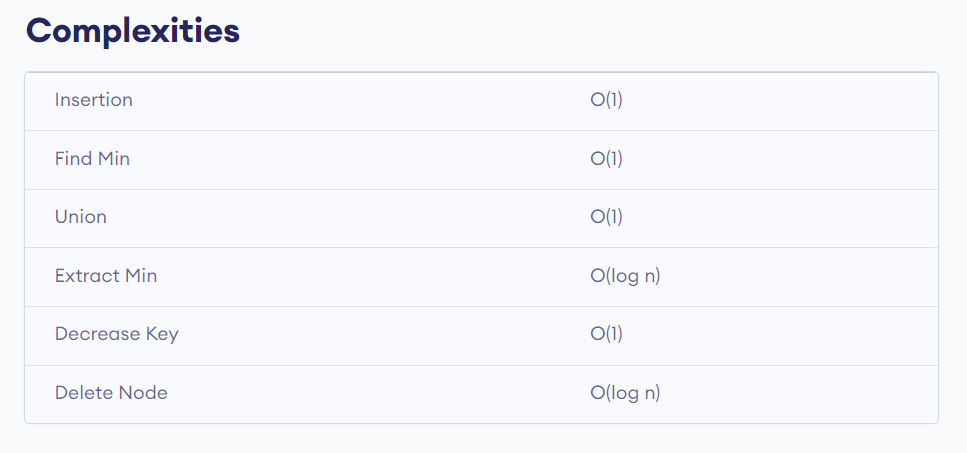

# Fibonacci Heap Applications
To improve the asymptotic running time of Dijkstra's algorithm.